# Implement a Feed-Forward-Network

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams["font.size"]= 15
import numpy as np
from IPython.display import display, Image


In [2]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
X.shape, y.shape

((50, 2), (50,))

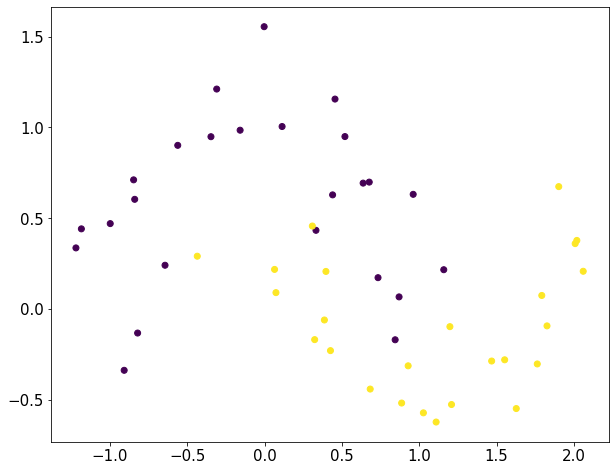

In [4]:
#make a scatterplot of the 2 columns of X
#color the data points according to the labels y
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [5]:
def add_bias(X):
    ''' It returns the input-NumPy array X with an additional colomn of ones
        Parameter X: numpy array 
    '''
    # Create an array of 1 with same number of rows as X
    n_rows = X.shape[0]
    n_cols = 1
    ones = np.ones(shape=(n_rows, n_cols))
      
    # Add ones to X
    X_with_ones = np.hstack((X,ones))
    return X_with_ones
    

In [6]:
#add bias
X_with_ones = add_bias(X)

In [7]:
X_with_ones.shape

(50, 3)

In [8]:
X_with_ones

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

In [9]:
#random input weights
w_in = np.random.rand(3,2) # ---> rand return random within [0, 1)

In [10]:
#random output weigth
w_out = np.random.rand(3,1)

In [11]:
w_in.shape, w_out.shape

((3, 2), (3, 1))

In [12]:
input_layer_1 = np.dot(X_with_ones, w_in)
input_layer_1.shape

(50, 2)

In [13]:
#write a sigmoid function
def sigmoid(z):
    '''It returns a NumPy array,
       where all of the original values z
       have been transformed by the sigmoid function
    Parameters:
    **********
    z: NumPy array
    '''
    y = 1 / (1 + np.exp(-z))
    return y

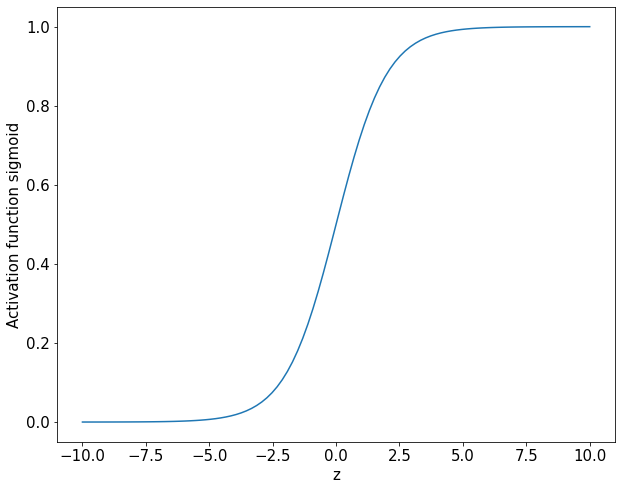

In [14]:
#plot sigmoid function
z = np.linspace(-10,10,100)
#plt.plot(0,0.5,marker='o')
plt.plot(z,sigmoid(z))
plt.xlabel('z')
plt.ylabel('Activation function sigmoid');

In [15]:
#test the sigmoid function
array = np.array([-10.0, 0.0, 10.0])
expected = np.array([0.0, 0.5, 1.0])
assert np.all(sigmoid(array).round(2) == expected)

In [16]:
#apply sigmoid function on step1
#output from the neurons of the hidden layer
out1 = sigmoid(input_layer_1)
out1.shape
out1

array([[0.68720367, 0.7927114 ],
       [0.6402197 , 0.75860268],
       [0.65235589, 0.76996844],
       [0.86324661, 0.88457642],
       [0.47242222, 0.67184844],
       [0.92244909, 0.92348204],
       [0.55440406, 0.71551869],
       [0.47769066, 0.67206535],
       [0.56770482, 0.72094289],
       [0.41778004, 0.63400421],
       [0.74338055, 0.82226961],
       [0.82371214, 0.86388451],
       [0.77117491, 0.83120116],
       [0.80249917, 0.85349346],
       [0.71505138, 0.80321455],
       [0.68305809, 0.78758632],
       [0.75686975, 0.82219376],
       [0.9110046 , 0.91513839],
       [0.90889497, 0.91371167],
       [0.5815686 , 0.73583123],
       [0.79089788, 0.84619093],
       [0.6990587 , 0.8000952 ],
       [0.25082188, 0.50190072],
       [0.58186269, 0.72752489],
       [0.59481797, 0.73711818],
       [0.67342647, 0.77915824],
       [0.81485968, 0.85530939],
       [0.5799771 , 0.73065799],
       [0.63240635, 0.75463474],
       [0.78377264, 0.842327  ],
       [0.

In [17]:
hidden_1 = add_bias(out1)
hidden_1.shape

(50, 3)

In [18]:
hidden_1

array([[0.68720367, 0.7927114 , 1.        ],
       [0.6402197 , 0.75860268, 1.        ],
       [0.65235589, 0.76996844, 1.        ],
       [0.86324661, 0.88457642, 1.        ],
       [0.47242222, 0.67184844, 1.        ],
       [0.92244909, 0.92348204, 1.        ],
       [0.55440406, 0.71551869, 1.        ],
       [0.47769066, 0.67206535, 1.        ],
       [0.56770482, 0.72094289, 1.        ],
       [0.41778004, 0.63400421, 1.        ],
       [0.74338055, 0.82226961, 1.        ],
       [0.82371214, 0.86388451, 1.        ],
       [0.77117491, 0.83120116, 1.        ],
       [0.80249917, 0.85349346, 1.        ],
       [0.71505138, 0.80321455, 1.        ],
       [0.68305809, 0.78758632, 1.        ],
       [0.75686975, 0.82219376, 1.        ],
       [0.9110046 , 0.91513839, 1.        ],
       [0.90889497, 0.91371167, 1.        ],
       [0.5815686 , 0.73583123, 1.        ],
       [0.79089788, 0.84619093, 1.        ],
       [0.6990587 , 0.8000952 , 1.        ],
       [0.

In [19]:
w_out.shape

(3, 1)

In [20]:
input_layer_2 = np.dot(hidden_1,w_out)
hidden_1.shape, w_out.shape, input_layer_2.shape

((50, 3), (3, 1), (50, 1))

In [21]:
out2 = sigmoid(input_layer_2)
out2

array([[0.83732011],
       [0.83141039],
       [0.833226  ],
       [0.85458952],
       [0.81303468],
       [0.86078433],
       [0.82234294],
       [0.81334224],
       [0.82363316],
       [0.80557581],
       [0.8430283 ],
       [0.85084277],
       [0.84522059],
       [0.84886988],
       [0.83974199],
       [0.83658345],
       [0.84364911],
       [0.85952803],
       [0.85930576],
       [0.82599188],
       [0.84762127],
       [0.83865761],
       [0.77922849],
       [0.82508802],
       [0.82680403],
       [0.83522967],
       [0.84960655],
       [0.82533918],
       [0.83059544],
       [0.84691207],
       [0.83656478],
       [0.85076712],
       [0.83405477],
       [0.84043688],
       [0.79009684],
       [0.84796574],
       [0.8467193 ],
       [0.82840799],
       [0.78846816],
       [0.835773  ],
       [0.84966332],
       [0.79448766],
       [0.81018794],
       [0.85851885],
       [0.801337  ],
       [0.84244251],
       [0.85310498],
       [0.832

In [22]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1], dtype=int64)

## Define a feed forward function

In [23]:
def feed_forward(X_input, w_in, w_out):
    '''This function calculates the outputs of layer for given X and weights by using feed forward network
    '''
    #append an extra column of ones for bias
    X_input = np.hstack([X_input, np.ones((X_input.shape[0], 1))])
    
    #multiply the input matrix X with the weights of the first layer
    input_layer_1 = np.dot(X_input,w_in)
    
    #apply the sigmoid function on the result
    output1 = sigmoid(input_layer_1)
    
    #append an extra column of ones to the result
    hidden_1 = np.hstack([input_layer_1, np.ones((input_layer_1.shape[0], 1))])
    
    #multiply the output of the previous step with the weights of the second layer
    input_layer_2 = np.dot(hidden_1, w_out)
    
    #apply the sigmoid function on the result.
    output2 = sigmoid(input_layer_2)
     
    # return all intermediate results
    return output1, output2

In [24]:
output_layer_1, output_layer_2 = feed_forward(X, w_in, w_out)

In [25]:
def sigmoid_deriv(X):
   '''derivative of sigmoid with respect to X'''

   return sigmoid(X) * (1-sigmoid(X))

In [26]:
def log_loss(y, ypred):
    
    """log is natural logarithm"""
    
    return -(y * np.log(ypred) + (1-y) * np.log(1-ypred)) 


def log_loss_deriv(y, ypred):
    
    """Derivative of log_loss with respect to ypred. """
   
    return -(y/ypred-(1-y)/(1-ypred))

In [27]:
#calculate the loss
ytrue = y.reshape(-1,1)
log_loss(ytrue, output_layer_2).sum()

53.980427983114886

# Backpropagation from Scratch

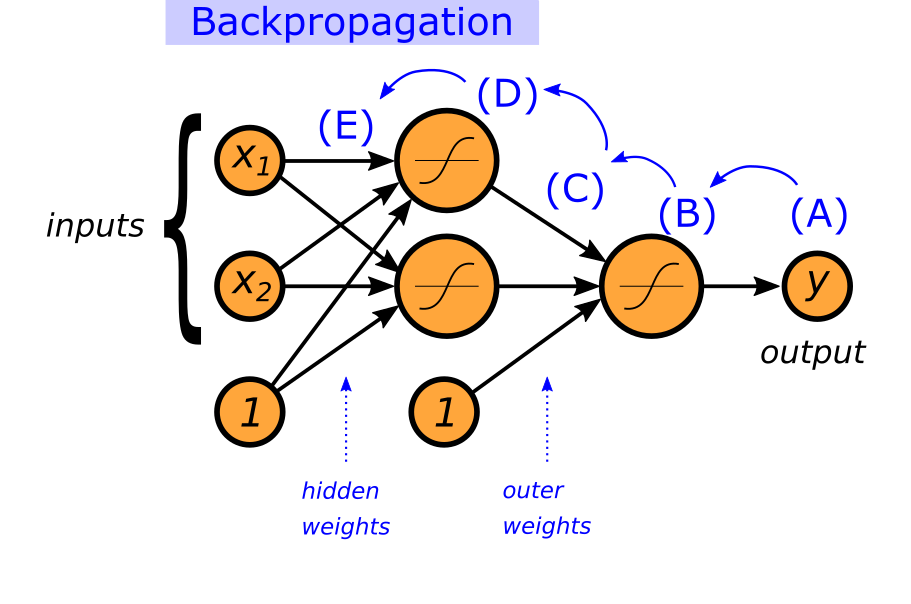

In [28]:
display(Image(filename='backprop.png'))

## Equation A. Take The Derivative of The Loss Function

In [29]:
#calculate the derivative of loss
deriv_log_loss = log_loss_deriv(ytrue, output_layer_2)
deriv_log_loss

array([[ 9.1255278 ],
       [-1.1541376 ],
       [-1.14412199],
       [-1.04973123],
       [ 4.6643096 ],
       [-1.02806193],
       [-1.20748856],
       [-1.27067235],
       [-1.19942588],
       [ 3.9807664 ],
       [11.36886655],
       [16.64594609],
       [-1.08715407],
       [14.94533003],
       [ 9.95263919],
       [ 8.8813085 ],
       [-1.09406268],
       [-1.03225971],
       [-1.03301303],
       [ 6.42016049],
       [14.01264254],
       [ 9.58182113],
       [ 2.50259077],
       [-1.19050912],
       [-1.18005192],
       [ 8.46914633],
       [-1.06893862],
       [-1.18871702],
       [-1.15858686],
       [13.53271165],
       [-1.12696732],
       [16.59177511],
       [-1.13997077],
       [10.21853757],
       [ 2.98528235],
       [14.242131  ],
       [-1.08078117],
       [-1.17088426],
       [ 2.90500221],
       [-1.13124797],
       [15.61428078],
       [ 3.22401832],
       [ 4.38262914],
       [-1.03570759],
       [ 3.6615104 ],
       [11

## Equation B. Calculate The Derivative of The Activation Function

In [30]:
hidden_out_with_bias = add_bias(output_layer_1)
sig_deriv_1 = sigmoid_deriv(hidden_out_with_bias.dot(w_out))
sig_deriv_1

array([[0.13621514],
       [0.14016715],
       [0.13896043],
       [0.12426627],
       [0.15200929],
       [0.11983467],
       [0.14609503],
       [0.15181664],
       [0.14526158],
       [0.15662343],
       [0.13233158],
       [0.12690935],
       [0.13082274],
       [0.12828981],
       [0.13457538],
       [0.13671158],
       [0.13190529],
       [0.12073959],
       [0.12089937],
       [0.14372929],
       [0.12915945],
       [0.13531102],
       [0.17203145],
       [0.14431778],
       [0.14319913],
       [0.13762107],
       [0.12777526],
       [0.14415442],
       [0.14070665],
       [0.12965201],
       [0.13672415],
       [0.12696243],
       [0.13840741],
       [0.13410273],
       [0.16584382],
       [0.12891984],
       [0.12978573],
       [0.14214819],
       [0.16678612],
       [0.13725649],
       [0.12773556],
       [0.16327702],
       [0.15378344],
       [0.12146423],
       [0.15919601],
       [0.13273313],
       [0.12531687],
       [0.139

In [31]:
ygrad_l2 =  sig_deriv_1 * deriv_log_loss
print(ygrad_l2.shape)

(50, 1)


## Equation C. Calculate Weight Change between 2 Layers

In [32]:
#learning rate
lr = 0.2

In [33]:
#calculate the gradient of this middle output.
delta_w2 = -np.dot(ygrad_l2.transpose(), 
                   hidden_out_with_bias) * lr
print(delta_w2.shape) 

(1, 3)


In [34]:
w_out_new = w_out + delta_w2.transpose()

In [35]:
w_out_new

array([[-3.39002152],
       [-3.49153073],
       [-4.58211181]])

## Equation D

In [36]:
sig_deriv_2 = sigmoid_deriv(add_bias(X).dot(w_in))

# We don't propagate the biases to the 
# previous level so we took it out.
h_grad = sig_deriv_2 * np.dot(ygrad_l2 , w_out[:-1].T)

In [37]:
print(h_grad.shape)

(50, 2)


## Equation E. Calculate Change in First Set of Weights.

In [38]:
delta_w1 = -np.dot(h_grad.transpose(), add_bias(X)) * lr
w_in_new = w_in + delta_w1.transpose() 

In [39]:
w_in_new

array([[ 0.92884882,  0.65220982],
       [ 0.60676453,  0.16002226],
       [-0.28858454,  0.17305381]])

## Define a backpropagation function

In [40]:
def backprop(wH,
             wO,
             output1,
             output2,
             ytrue,
             X_input,
             LR):
    '''This function calculates the new weights of hidden and output for given X and weights by using backpropagation
    '''
   
    X_input = np.hstack((X_input, np.ones((X_input.shape[0],1))))
  

    '''EQUATION A:'''
    loss_gradient = log_loss_deriv(ytrue, output2)

    '''EQUATION B:'''
    # don't forget the bias!
    hidden_out_with_bias = add_bias(output1)
    # derivative of the sigmoid function with respect to the
    # hidden output * weights
    sig_deriv_1 = sigmoid_deriv( hidden_out_with_bias.dot(wO) )

    y_grad = sig_deriv_1 * loss_gradient

    '''EQUATION C:'''
    delta_wo = -np.dot( y_grad.transpose(), hidden_out_with_bias ) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid_deriv(X_input.dot(wH) )
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    H_grad = sig_deriv_2  * np.dot(y_grad , wO[:-1].transpose())

    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.transpose(),X_input) * LR

    #old weights + delta weights -> new weights!
    wH_new = wH + delta_wH.transpose()

    # new hidden weights, new output weights
    return wH_new, wO_new

In [42]:
# train
LOSS_VEC = []

for i in range(1000):
    out1, out2 = feed_forward(X, w_in, w_out)
    LOSS_VEC.append(log_loss(ytrue, out2).sum())
    w_in_new , w_out_new = backprop(
                            w_in,
                            w_out,
                            output_layer_1,
                            output_layer_2,
                            ytrue,
                            X,
                            lr,
                           )
    w_in  = w_in_new
    w_out = w_out_new

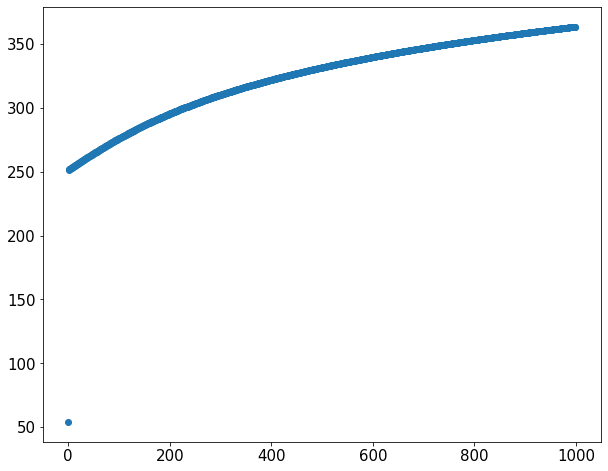

In [43]:
iteration = []
for i in range(1000):
    iteration.append(i)
    i+=1

plt.scatter(iteration,LOSS_VEC)
plt.show()

In [49]:
loss_plot = []
x = []
wh1_li = []
wh2_li = []
wo1_li = []
wo2_li = []
losses = []
for i in range(30):
    if i == 0:
        outer_weights = np.random.random(size=(3, 1))
        inner_weights = np.random.random(size=(3, 2))
        dec_loss = 30
    lr = 0.05
    hidden_out, ypred = feed_forward(X, inner_weights,outer_weights)
    ypred = ypred.reshape(50)
    grad_y, delta_w = backprop(inner_weights,outer_weights, hidden_out,ytrue,X,lr)
    outer_weights = outer_weights.reshape(3)
    outer_weights = outer_weights + delta_w
    outer_weights_rs = outer_weights.reshape(1, 3)
    grad_y_rs = grad_y.reshape(50, 1)
    right_h = np.dot(grad_y_rs, outer_weights_rs)
    grad_ho = hidden_out_wb * right_h
    grad_ho = grad_ho.reshape(3, 50)
    
    delta_wi = np.dot(-grad_ho, Xc) * lr
    inner_weights = inner_weights + delta_wi
    desc_loss = loss(ytrue, ypred).sum()
    loss_plot.append(desc_loss)
    x.append(i)
    print('The new loss is: ', desc_loss)
    print('new inner weights are: ', inner_weights)
    print('new outer weights are: ', outer_weights)
    print('iteration is: ', i)
    print('\n\n')
    losses.append(desc_loss)
    ypred[ypred >= 0.5] = 1
    ypred[ypred <= 0.5] = 0
    ypred = ypred.astype(int)
    if i > 10:
        plt.scatter(X[:, 0], X[:, 1], c=ypred)
        plt.show()
        if losses[-10] < losses[i]:
            break

plt.plot(x, loss_plot)
plt.show()

TypeError: backprop() missing 1 required positional argument: 'LR'